In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'svg'
## Disable Warnings
tf.logging.set_verbosity(tf.logging.ERROR)

### Download MNIST Data Set and load into those variables

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

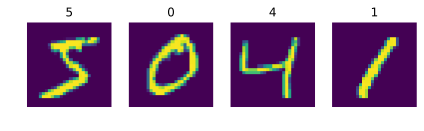

In [3]:
fig, axes= plt.subplots(1,4, figsize=(7,3))
for img, label, ax in zip(x_train[:4], y_train[:4], axes):
    ax.set_title(label)
    ax.imshow(img)
    ax.axis('off')
plt.show()

### We must flatten the images and scale them from 0-1

In [4]:
x_train = x_train.reshape(60000, 784) / 255
x_test = x_test.reshape(10000, 784) / 255


### Create a one hot-array for the y-values
### Creates an array of 10 elements

In [5]:

with tf.Session() as sesh:
    y_train = sesh.run(tf.one_hot(y_train, 10))
    y_test = sesh.run(tf.one_hot(y_test, 10))

y_train[:4]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [6]:
# hyper parameters
learning_rate = 0.01
epochs = 50

# Divide the total number of pictues by the batch size to get num of batches
batch_size = 100
batches = int(x_train.shape[0] / batch_size)

Y is a 10 element list. x is a 784 element long list since we flattened it. w is a matrix of size 784 x 10. b is a 10 element matrix. y = wx + b

## Inputs:
### X is the "flattened / normalized: images
### Y is the "one hot' labels

In [14]:
X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.float32, [None, 10])

W = tf.Variable(0.1 * np.random.randn(784, 10).astype(np.float32))
B = tf.Variable(0.1 * np.random.randn(10).astype(np.float32))

### Softmax function converts all prediction scores to probabilities and makes the sum of the probabilities equal to 1. 

In [15]:
pred = tf.nn.softmax(tf.add(tf.matmul(X,W), B))
cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(pred), axis=1)) #tf.log() is the natrual log
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

## Explanation for Cost Function:

$
C =  \sum -Y\ln(pred)
$

### What the natural log function looks like

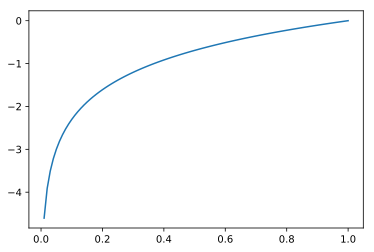

In [16]:
x = np.linspace(1/100, 1, 100) #(start,stop, num)
plt.plot(x, np.log(x)) # Natural log
plt.show()

#### Example Data:

In [17]:
a = np.log([[0.04, 0.13 ,0.96, 0.12],     #Top array is a correct prediction, bottom array is incorret
            [0.01, 0.93, 0.06, 0.07]])     # pred 
b = np.array([[ 0,    0,    1,     0],
              [ 1,    0,    0,     0]])     # labels 

- a * b

array([[0.        , 0.        , 0.04082199, 0.        ],
       [4.60517019, 0.        , 0.        , 0.        ]])

#### When you take the log of a value close to 1 you get a number close to 0, when that is multiplied by the label array you should get a negative value close to 0. If the prediction is incorrect, youll take the log of a low number and get a big negative number, which when multiplied by 1 and the negative in the cost function, returns a big positive number.  Correct prediction should be a low value, incorrect prediction should be a high value. 


#### The code below is the same as -tf.reduce_sum(Y * tf.log(pred), axis=1). Reduce sum is just the sum really and reduce man is just the mean.We take the average to determine the overal cost. If predictions are correct, they will be closer to 0, so the mean will be lower. More incorrect predictions will raise the mean. Using this function confident wrong predictions are penalized more than confident right predictions are rewarded

In [18]:
r_sum = np.sum(-a * b, axis =1)
r_mean = np.mean(r_sum)
print(r_sum)
print(r_mean)  #Cost


[0.04082199 4.60517019]
2.322996090254173


In [23]:
with tf.Session() as sesh:
    sesh.run(tf.global_variables_initializer())
    
    for epoch in range(epochs):
        for i in range(batches):
            x = x_train[i * batch_size: (i + 1) * batch_size]     # Loop through all the bathes every epoch
            y = y_train[i * batch_size: (i + 1) * batch_size]
            sesh.run(optimizer, feed_dict = {X: x, Y: y})
            c = sesh.run(cost, feed_dict={X: x, Y: y})
            
        if not epoch % 1:
            print(f'epoch:{epoch} cost={c:.4f}')
    
    correct_pred = tf.equal(tf.argmax(pred,1), tf.argmax(Y,1))
    accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))  # Loop through test data to determine accuracy
    acc = accuracy.eval({X: x_test, Y: y_test})
    print("Final Accuracy: ",acc * 100)

epoch:0 cost=0.9574
epoch:1 cost=0.7036
epoch:2 cost=0.5961
epoch:3 cost=0.5347
epoch:4 cost=0.4946
epoch:5 cost=0.4661
epoch:6 cost=0.4448
epoch:7 cost=0.4282
epoch:8 cost=0.4149
epoch:9 cost=0.4041
epoch:10 cost=0.3950
epoch:11 cost=0.3873
epoch:12 cost=0.3807
epoch:13 cost=0.3749
epoch:14 cost=0.3699
epoch:15 cost=0.3654
epoch:16 cost=0.3614
epoch:17 cost=0.3577
epoch:18 cost=0.3545
epoch:19 cost=0.3515
epoch:20 cost=0.3487
epoch:21 cost=0.3462
epoch:22 cost=0.3439
epoch:23 cost=0.3417
epoch:24 cost=0.3397
epoch:25 cost=0.3378
epoch:26 cost=0.3360
epoch:27 cost=0.3343
epoch:28 cost=0.3328
epoch:29 cost=0.3313
epoch:30 cost=0.3298
epoch:31 cost=0.3285
epoch:32 cost=0.3272
epoch:33 cost=0.3260
epoch:34 cost=0.3248
epoch:35 cost=0.3237
epoch:36 cost=0.3227
epoch:37 cost=0.3216
epoch:38 cost=0.3206
epoch:39 cost=0.3197
epoch:40 cost=0.3188
epoch:41 cost=0.3179
epoch:42 cost=0.3170
epoch:43 cost=0.3162
epoch:44 cost=0.3154
epoch:45 cost=0.3146
epoch:46 cost=0.3139
epoch:47 cost=0.3132
ep